<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/115%20-%20Lesson%20115%20(PCA%20-%20Data%20Visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 115: PCA - Data Visualisation

---

### Teacher-Student Activities

In the previous classes, we learned one of the applications of unsupervised learning known as Clustering. These algorithms partition the dataset into clusters of similar items, thereby discovering hidden patterns in the data.

Going forward, we will start exploring another application of unsupervised learning called **Dimensionality Reduction**. This technique will help us to reduce the number of features (also known as *dimensions*) in the dataset. A popular dimensionality reduction technique that we will explore is **Principal Component Analysis (PCA)**.

In this lesson, we will examine a new problem statement  to understand the use of PCA in data visualisation. Let us look at the problem statement first.


---

#### Problem Statement

We are given a dataset that comprises information on physical properties of wheat kernels belonging to three different varieties of wheat: Kama, Rosa, and Canadian.  

**Wheat** is a grass widely cultivated for its seed.
The **wheat kernel** is the seed from which the wheat plant grows. The figure below shows some physical features of wheat kernel:

<center>
<img src=https://s3-whjr-v2-prod-bucket.whjr.online/d23dce74-ef6e-4b95-939a-b187faa4319a.png width='650'> </center>

This dataset consists of following attributes of a wheat kernel:

|Attribute|Attribute Information|
|-|-|
|`A`|Area ($\text{mm}^2$)|
|`P`|Perimeter (mm)|
|`C`|Compactness is calculated as $\frac{4 \times \pi \times A}{P^2}$|
|`LK`| Length of Kernel (mm)|
|`WK`|Width of Kernel (mm)|
|`A_Coef`|Asymmetry Coefficient (a measure of asymmetry in the kernel shape)|
|`LKG`|Length of Kernel Groove (mm)|
|`target`|Kernel Type (`0` = Kama, `1` = Rosa, `2` = Canadian)|


**Dataset credits:** https://archive.ics.uci.edu/ml/datasets/seeds

**Citation:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

Let us implement PCA on this dataset to understand and visualise the basic structure, patterns, and relationships of the dataset.






---

#### Activity 1: Import Modules and Read the Data

Let's import the necessary Python modules, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).


Dataset link: https://s3-whjr-curriculum-uploads.whjr.online/52e55558-5ad7-4f93-a854-8186f415bc55.csv

In [ ]:
# S1.1: Import the Python modules, read the dataset and create a Pandas DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/52e55558-5ad7-4f93-a854-8186f415bc55.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


Rename the following columns so that they are easy to interpret using `rename()` function of the DataFrame:
- `A` to `area`
- `P` to `perimeter`
- `C` to `compactness`
- `LK` to `kernel_length`
- `WK` to `kernel_width`
- `A_Coef` to `asymmetry_coefficient`
- `LKG` to `kernel_groove_length`



In [ ]:
# S1.2: Rename the columns for better understandability
df.rename(columns = {'A' : 'area', 'P' : 'perimeter', 'C' : 'compactness', 'LK' : 'kernel_length', 'WK' : 'kernel_width', 'A_Coef' : 'asymmetry_coefficient', 'LKG' : 'kernel_groove_length'}, inplace = True)

Next, find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
# S1.3: Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
df.shape

(210, 8)

In [ ]:
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
 7   target                 210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 14.8 KB


The dataset consists of $210$ entries and no missing (or null) values. All the columns are numerical, hence feature encoding is not needed.

Let's perform some basic EDA on the dataset.

---

#### Activity 2: Exploratory Data Analysis

Let us determine whether there are any anomalies or irregularities in the dataset.

**1. Kernel Length vs Kernel Width**

The width of a wheat kernel must always be less than the length of the kernel. Let us extract the instances where `kernel_width` is greater than `kernel_length`.

In [ ]:
# S2.1: Check for anomalies in 'kernel_width' and 'kernel_length'.
df[df['kernel_width'] > df['kernel_length']]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target


As you can observe that there are no instances where `kernel_width` is greater than `kernel_length`.

**2. Kernel Groove Length vs Kernel Length**

The length of kernel groove must be less than the kernel length. Let us find out the instances where `kernel_groove_length` is greater than `kernel_length`.

In [ ]:
# S2.2: Check for anomalies in kernel_groove_length and kernel_length.
df[df['kernel_groove_length'] > df['kernel_length']]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
80,16.53,15.34,0.8823,5.875,3.467,5.532,5.880,1
85,18.27,16.09,0.8870,6.173,3.651,2.443,6.197,1
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109,1
97,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
98,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200,1
134,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,1
139,16.23,15.18,0.8850,5.872,3.472,3.769,5.922,1
150,11.83,13.23,0.8496,5.263,2.840,5.195,5.307,2
154,11.36,13.05,0.8382,5.175,2.755,4.048,5.263,2


Here we see that there are instances where `kernel_groove_length` is greater than `kernel_length`. Although not physically possible this may be due to error/noise in measurement.

Let's remove these anomalies from the dataset and obtain a new DataFrame which consists of only those rows where `kernel_groove_length` is less than `kernel_length`.

In [ ]:
# S2.3: Obtain a clean DataFrame
clean_df = df[df['kernel_groove_length'] < df['kernel_length']]
clean_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


Now the DataFrame `clean_df` has data points of wheat kernels where there are no physical discrepancies for `kernel_length` and `kernel_groove_length`.

Let's validate the  values in the `compactness` column using the formula provided in the dataset description. To do this, let us first copy our DataFrame `clean_df` to a new DataFrame `validation_df` using the `copy()` function.

**Syntax of `copy()` function:** `DataFrame.copy()`


In [ ]:
# S2.4: Create a duplicate copy of the 'clean_df' DataFrame.
clean_df_copy = clean_df.copy()


As per dataset description, the compactness of a wheat kernel is calculated as:

\begin{align}
\frac{4 \times \pi \times A}{P^2}
\end{align}

Where,
- $A$ is the area of the kernel
- $P$ is the perimeter of the kernel
- $\pi$ is a constant value equal to $3.14159$ approx.

Add a new column `compactness_formula` to `validation_df` DataFrame which contains the compactness values of wheat kernels calculated using the above formula.

**Note:** To obtain the $\pi$  value, import  `math` module and use `math.pi` constant.

In [ ]:
# S2.5: Calculate the compactness value using the given formula
import math

clean_df['compactness_formula'] = (4 * math.pi * clean_df_copy['area']) / (clean_df_copy['perimeter'] ** 2)

<ipython-input-23-23940a212fe4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['compactness_formula'] = (4 * math.pi * clean_df_copy['area']) / (clean_df_copy['perimeter'] ** 2)


Observe the values of the `compactness` column and `compactness_formula` column in `validation_df` DataFrame. It seems like the values of the `compactness` column are rounded from the formula.

Let's see the instances where the difference in these two columns is more than $0.01$ (considering 1% rounding off error).

In [ ]:
# S2.6: Check for anomalies in 'compactness' feature
clean_df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0.870756
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0.880833
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0.904524
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0.894995
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0.902631


In [ ]:
clean_df[clean_df['compactness'] - clean_df['compactness_formula'] > 0.01]

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length,target,compactness_formula


You may observe that there are no data points which exhibit compactness calculation error. Hence, we can say that there are no anomalies in `compactness` column.

As our dataset is now free from all the anomalies and irregularities, let us perform some data visualisation.

---

#### Activity 3: Data Visualisation


Let us now check the feature distribution and outliers.


Use `boxplot()` function of `seaborn` module and pass `target` as $x$-axis values and the other features as $y$-axis values to create boxplots for all the features. Use subplots to display these boxplots.

**Syntax for `boxplot()` function:** `seaborn.boxplot(x = None, y = None, data = None, ax = None)`

Where,
 - `x` and `y` are features of the dataset.
 - `data` is the DataFrame.
 - `ax` is the axes object.





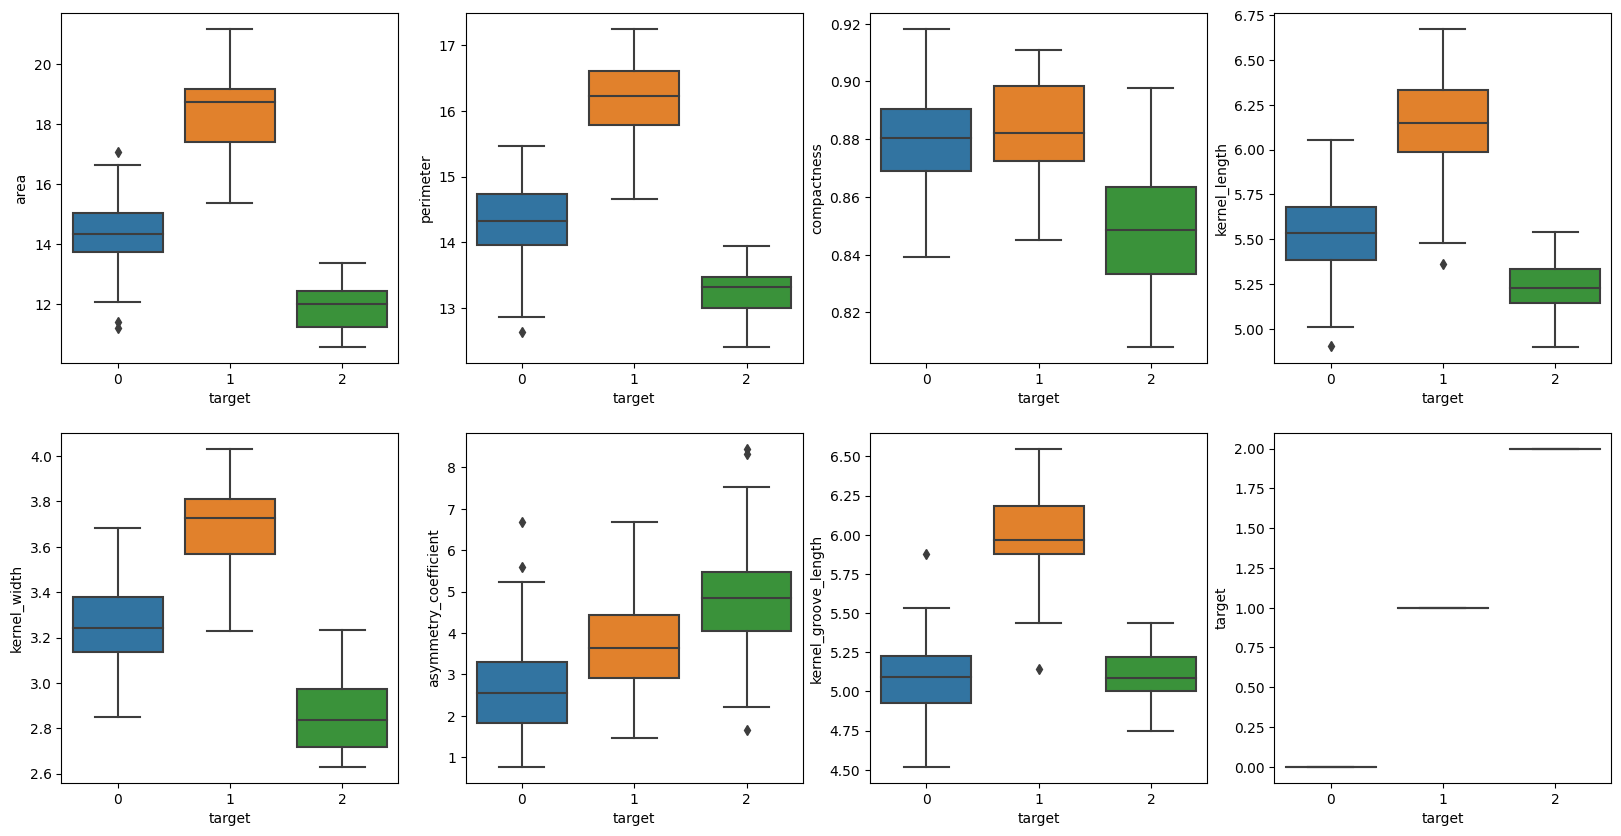

In [ ]:
# S3.1: Create boxplots for 'clean_df' columns using subplot.
fig, axis = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))
counter = 0
for i in range(0,2):
  for j in range(0,4):
    sns.boxplot(x = 'target', y = clean_df_copy.iloc[:,counter], data = clean_df_copy, ax = axis[i,j])
    counter = counter + 1
plt.show()

Here we see the majority of the features are distributed throughout the varieties of wheat, and there are no significant outliers for any of the features.

Next, we will try to understand the correlation between variables. For this, compute the correlation matrix among all the variables and plot a heat map.

<Axes: >

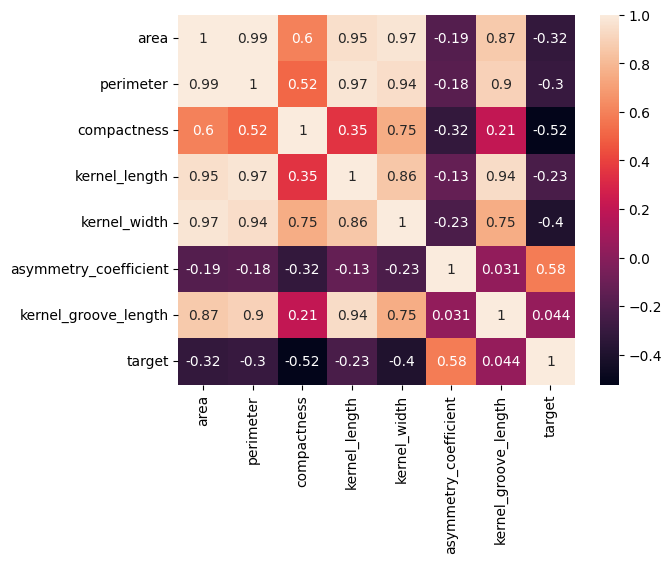

In [ ]:
# S3.2: Let's check the correlation of features
sns.heatmap(clean_df_copy.corr(), annot = True)

From the above correlation heatmap, we can observe that `asymmetry_coefficient`, `compactness`, and `kernel_width` exhibit moderate correlation  with `target`.

Let us create an interactive 2D scatter plot using the `scatter()` function of `plotly.express` module. Plot highly correlated features `asymmetry_coefficient` and `compactness` on $x$-axis and $y$-axis respectively and colour code the data points with respect to the wheat varieties.



In [ ]:
# S3.3: Scatterplot for wheat variety using 2 features
import plotly.express as px

plt.figure(figsize = (10,8))
plot = px.scatter(clean_df_copy, x = 'asymmetry_coefficient', y = 'compactness', color = 'target')
plot.show()

<Figure size 1000x800 with 0 Axes>

The above scatter plot does not clearly distinguish between different wheat variety. Moreover, this scatter plot does not convey information on other features. Let us use one more feature `kernel_width` which has high correlation with `target` to visualise this dataset.


Create an interactive 3D scatter plot using the `scatter_3d()` function of `plotly.express` module. Plot the three features `asymmetry_coefficient`, `compactness`, and `kernel_width` on  $x$-axis, $y$-axis and $z$-axis respectively and colour code the data points with respect to the wheat varieties.


In [ ]:
# S3.4: Scatterplot for wheat variety using 3 features
plt.figure(figsize = (10,8))
plot = px.scatter_3d(clean_df_copy, x = 'asymmetry_coefficient', y = 'compactness', z = 'kernel_width', color = 'target')
plot.show()

<Figure size 1000x800 with 0 Axes>

From the above 3D scatter plot, you may observe that after adding `kernel_width` dimension, visualisation is now better. The feature `kernel_width` gave us a  good separation of wheat varieties.

*What if we want to add more than 3 features or dimensions to this scatter plot?*

We still have other features like `kernel_length`, `area`, `kernel_groove_length`, and `perimeter` that can help us to improve visualisation and obtain better data interpretation. But, **can you imagine a scatter plot  having more than $3$ dimensions or axis?**


The answer is **no**! Hence, we need a technique that can transform or reduce our  7-dimensional dataset into a low dimensional dataset such as 2D or 3D. Such low dimensional datasets are easier to plot and can be easily interpreted. This technique is known as **Dimensionality Reduction**. There are various dimensionality reduction techniques out of which we will explore only **Principal Component Analysis (PCA)**.

Before diving into PCA, let us understand in more detail why there is a need for dimensionality reduction in machine learning.



---

#### Curse of Dimensionality

**Dimension** refers to the number of features associated with a dataset. Several real-world Machine Learning problems involve hundreds or even tens of thousands of features. Not only does this make training extremely slow, but also finding optimal solution becomes harder. This problem is often referred to as the **curse of dimensionality.**

To avoid the curse of dimensionality, we need a technique to reduce the number of dimensions while keeping the useful information that is provided. This is achieved using dimensionality reduction.

Following are the benefits of performing dimensionality reduction:
1. It reduces the time and storage space required.
2. It becomes easier to visualise the data when reduced to very low dimensions such as 2D or 3D.
3. It is also helpful in the pre-processing or feature engineering stages  as the machine learning model needs to deal only with the most relevant information rather than all features.

Consider a sphere in a 3D space. We can project the sphere into lower 2D space into a circle
with some information loss (the value for the $z$ coordinate) but still retaining much of the
information that describes its original shape. This is exactly what we will achieve by using PCA.

<center>
<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b7fa3b5c-6cc9-498c-815b-1b43c85c8f77.png"/>

`Fig: Transformation of 3D sphere into a 2D space`</center>

Let us first apply PCA using `sklearn` library to the wheat kernel dataset and observe how the 7-dimensional dataset is reduced to lower dimensional data.

---

#### Activity 4: Applying PCA

Principal Components Analysis (PCA) is a dimensionality reduction technique. This algorithm transforms the features of a dataset into a new set of features called **Principal Components**. By doing this, a major chunk of the information of the entire dataset is effectively compressed in fewer columns. We will learn more about principal components in the next class.

Let us first implement PCA using `sklearn` library and  then we will discuss the complete concept behind the PCA algorithm in the later section.

Before applying PCA, let us obtain a new DataFrame containing only feature variables.

In [ ]:
# S4.1: Create a DataFrame having only feature variables
from sklearn.decomposition import PCA

clean_df_copy.drop(['target'], axis = 1, inplace = True)

In [ ]:
clean_df_copy

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Let us normalise the above DataFrame before performing PCA so that all the columns have the same mean and variance.

In [ ]:
# S4.2: Normalise the column values.
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss_fit_transform = ss.fit_transform(clean_df_copy)

In [ ]:
ss_df = pd.DataFrame(ss_fit_transform)
ss_df.columns = clean_df_copy.columns
ss_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,0.137294,0.211526,-0.012130,0.307200,0.129752,-0.964557,-0.343965
1,0.005179,0.002040,0.413828,-0.169903,0.185749,-1.762019,-0.887953
2,-0.199947,-0.370380,1.421788,-0.770278,0.196415,-0.647693,-1.157887
3,-0.356398,-0.486762,1.021134,-0.694946,0.308408,-0.939367,-1.199098
4,0.443244,0.327907,1.354309,0.067507,0.796380,-1.538624,-0.436690
...,...,...,...,...,...,...,...
189,-0.930055,-1.060909,0.295740,-1.121828,-0.752864,-0.029875,-1.065162
190,-1.263819,-1.309189,-0.851394,-1.114980,-1.248835,0.430174,-0.791107
191,-0.578908,-0.704007,0.717481,-0.895832,-0.083569,3.075124,-0.681897
192,-1.051740,-1.053150,-0.809220,-1.035082,-1.139508,-0.051751,-0.706624


**PCA projection to 2D:**

Let us now apply PCA on the above scaled DataFrame to project the original data which is 7-dimensional into 2 dimensions. Follow the steps given below to achieve this:

1. Import `PCA` from `sklearn.decomposition` module.
2. Pass the number of components/dimensions to the PCA constructor using the following syntax:

  **Syntax:** `PCA(n_components = None)`

  Where, `n_components` is the number of components to keep. As we are projecting the dataset into  2 dimensions, `n_components` would be `2` in this case.

3. Call the `fit_transform()` function on PCA object to obtain the new set of features or principal components. These components are nothing but the new set of features or columns obtained after PCA transformation.

In [ ]:
# S4.3: Transform dataset into 2D using PCA
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(ss_df)

As the value of `n_components` attribute is `2`, we obtained a 2D array consisting of new set of features. Let us convert this 2D array into a pandas DataFrame and assign column names to this array.

In [ ]:
# S4.4: Convert 2D array to pandas DataFrame
pca_df = pd.DataFrame(data = pca_fit, columns = ['pc1', 'pc2'])

In [ ]:
clean_df_copy

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Thus, we have successfully transformed our 7-dimensional dataset into a 2D dataset. Let us  again create a scatter plot with `PC1` values on $x$-axis and `PC2` values on $y$-axis. Also, colour code the data points with respect to the wheat varieties.





In [ ]:
# S4.5: Scatterplot for wheat variety using 2 principal components
plt.figure(figsize = (10,8))
plot2 = px.scatter(pca_df, x = 'pc1', y = 'pc2', color = clean_df['target'])
plot2.show()

<Figure size 1000x800 with 0 Axes>

As you can see, we obtained a visualisation of the entire dataset by considering compressed set of features rather than original features. Thus, by using PCA, we  can reduce the dimension of the dataset while also retaining as much information as possible.

**PCA projection to 3D:**

Let us also apply PCA on the scaled DataFrame to project the original data which is 7-dimensional into 3 dimensions. Follow the same steps as done for 2D, except that the value of `n_components` will be `3`.


In [ ]:
# S4.6: Transform dataset into 3D using PCA
pca2 = PCA(n_components = 3)
pca2_fit = pca2.fit_transform(ss_df)


As the value of `n_components` attribute is `3`, we obtained a 3D array consisting of new set of features. Let us convert this 3D array into a pandas DataFrame and assign column names to this array.

In [ ]:
# S4.7: Convert 3D array to pandas DataFrame
pca2_df = pd.DataFrame(pca2_fit, columns = ['pc1', 'pc2', 'pc3'])

Thus, we have successfully transformed our 7-dimensional dataset into a 3D dataset. Let us  again create a 3D scatter plot with `PC1` values on $x$-axis, `PC2` values on $y$-axis and `PC3` values on $z$-axis. Also, colour code the data points with respect to the wheat variety.





In [ ]:
# S4.8: Scatterplot for wheat variety using 3 features
plt.figure(figsize = (10,8))
plot = px.scatter_3d(pca2_df, x = 'pc1', y = 'pc2', z = 'pc3', color = clean_df['target'])
plot.show()

<Figure size 1000x800 with 0 Axes>

Thus, with PCA we have visualised a high dimensional data using `PC1`, `PC2`, and `PC3` as the axes.

PCA can also be combined with clustering to obtain better visualisation of our clustering result, or simply to understand the pattern in our dataset.

We will stop here. In the next class, we will learn what exactly principal components are, how much information each principal component holds and how to compute them from scratch without using any python packages.

---

### **Project**
You can now attempt the **Applied Tech Project 115 - PCA I - Data Visualisation** on your own.

**Applied Tech Project 115 - PCA I - Data Visualisation**: https://colab.research.google.com/drive/11qEXjdkuU6YN_K2645B9mzU1RcsIo2Qp

---